In [1]:
#importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read dataset

In [4]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\car_age_price.csv')

In [5]:
#displays the first five rows of the dataframe by default

In [6]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
#check the diamension of dataset

In [8]:
data.shape

(112, 2)

In [9]:
#prints information about the DataFrame

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [11]:
#returns the number of missing values in each column

In [12]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [13]:
#Scatterplot of given  Year Vs Price

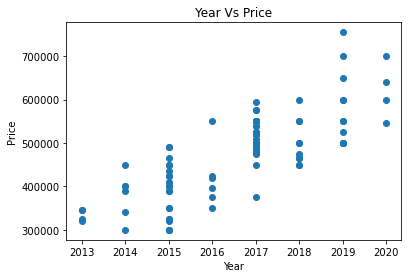

In [14]:
%matplotlib inline
plt.title("Year Vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(data.Year,data.Price)
plt.show()

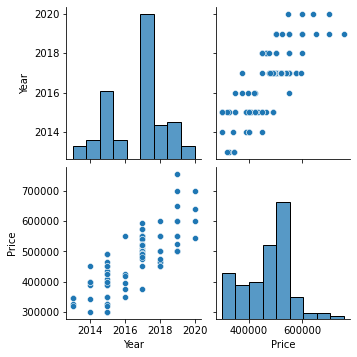

In [15]:
sns.pairplot(data)

In [16]:
#Find the best linear relationship between year and price.Finding correlation matrix and plot a heat map

<AxesSubplot:>

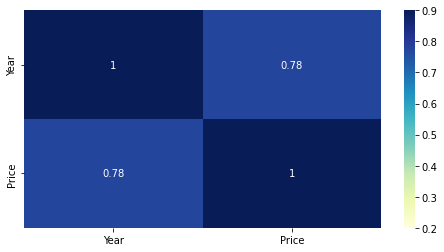

In [17]:
corr_matrix=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix,vmin=0.2,vmax=0.9,annot=True,cmap='YlGnBu')

In [18]:
#From this clear that price and year is highly co-realated

In [19]:
#get column names of dataframe

In [20]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [21]:
#feature and target is taken.Target is price.

In [22]:
X=data.drop(['Price'], axis=1)
y=data['Price']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(X_train,y_train)
predictions=model1.predict(X_test)

In [25]:
#printing y_test values

In [26]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [27]:
#printing the predicted values for X_test

In [28]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [29]:
#predict the possible price of a 2022 model second-hand grand i10

In [30]:
lr.predict([[2022]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 4326906256.829671
R squared value is: 0.36759313425902185


In [33]:
#Visualize the actual prices and predicted prices

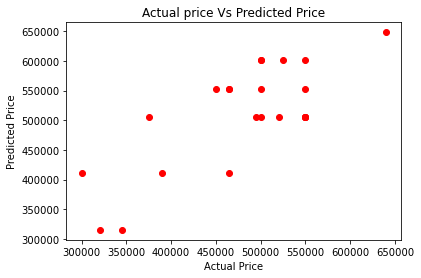

In [34]:
plt.scatter(y_test,predictions,color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price Vs Predicted Price")
plt.show()

# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso_reg=Lasso(alpha=1)
model2=lasso_reg.fit(X_train,y_train)
predictions=model2.predict(X_test)

In [37]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [38]:
predictions

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507495, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507495, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507495, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [39]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 4326859771.015768
R squared value is: 0.3675999284778302


In [40]:
#predict the possible price of a 2022 model second-hand grand i10?

In [41]:
lasso_reg.predict([[2022]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427145])

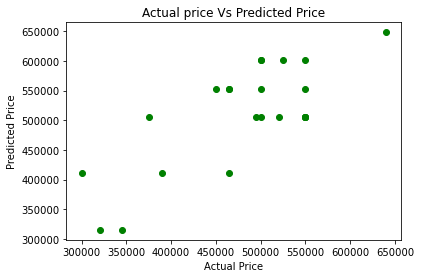

In [42]:
plt.scatter(y_test,predictions,color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price Vs Predicted Price")
plt.show()

In [ ]:
#Lasso regression having comparatively less MSE value than linear reggression.Model2 is performing better.